In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

sys.path.insert(0, '/home/aew492/research-summer2020/code')
import globals
globals.initialize_vals()

In [110]:
grad_dir = globals.grad_dir

In [111]:
def load_suave_amps(cat_tag, rlzs=401, m=1.0, b=0.5, basis='bao_iterative'):
    amps = np.empty((rlzs,4))
    for rlz in range(rlzs):
        suave_dict = np.load(os.path.join(grad_dir, f'suave_data/{cat_tag}/{basis}/{cat_tag}_rlz{rlz}_m-{m}00-L_b-{b}00.npy'), allow_pickle=True).item()
        amps[rlz] = suave_dict['amps']
    return amps
        

In [112]:
def load_patch_amps(cat_tag, rlzs=401, m=1.0, b=0.5, npatches=8):
    amps = np.empty((rlzs,4))
    for rlz in range(rlzs):
        patch_dict = np.load(os.path.join(grad_dir, f'patch_data/{cat_tag}/{npatches}patches/test_dir/{cat_tag}_rlz{rlz}_m-{m}00-L_b-{b}00.npy'), allow_pickle=True).item()
        amps[rlz] = patch_dict['theta'].flatten()
    return amps

### precision scalings, Weinberg OSU

In [113]:
def std_grad(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1))) * (V**(-1/3))  # last factor is from position dependence across box
    return std

In [114]:
# Power spectrum
def load_Pk(cat_tag):
    Pk = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pk.txt')
    return Pk

In [115]:
def load_PkG(cat_tag):
    PkG = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pkG.dat')
    return PkG

In [116]:
k, Pk = load_Pk('L750_n2e-4_z057_patchy_As2x').T
kG, PkG = load_PkG('L750_n2e-4_z057_patchy_As2x').T

In [117]:
# let's naively take the value of xi at r=40
r_rep = 40
k_rep = 1/r_rep
k_rep = min(kG, key=lambda x:abs(x-k_rep))  # closest r value to 40
P_rep = PkG[np.where(kG==k_rep)]
k_rep, P_rep

(0.02511886432, array([76730.64364]))

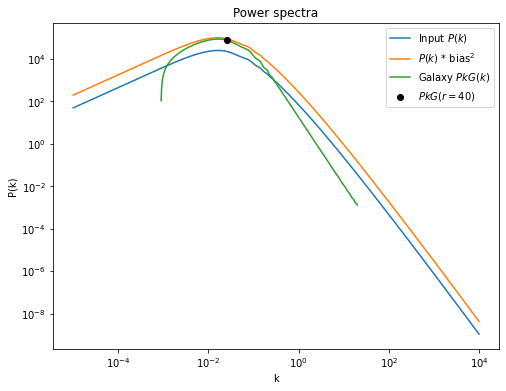

In [129]:
fig, ax = plt.subplots(figsize=(8,6))

bias = 2.0
ax.plot(k, Pk, label='Input $P(k)$')
ax.plot(k, Pk*bias**2, label='$P(k)$ * bias$^2$')
ax.plot(kG, PkG, label='Galaxy $PkG(k)$')

ax.scatter(k_rep, P_rep, marker='o', color='k', zorder=10, label='$PkG(r=40)$')

ax.set_title('Power spectra')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
plt.legend()

### boxsize vs. std

In [15]:
# gradient values
m = np.array([1.0,0,0])
b = 0.5

In [16]:
# fixed basis: (some not ready yet)
# amps_baofix_L500_n1e4_z057_patchy_As2x = load_suave_amps('L500_n1e-4_z057_patchy_As2x', basis='bao_fixed')
# amps_baofix_L500_n2e4_z057_patchy_As2x = load_suave_amps('L500_n2e-4_z057_patchy_As2x', basis='bao_fixed')
amps_baofix_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x', basis='bao_fixed')
amps_baofix_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x', basis='bao_fixed')

# stds_baofix_L500_n1e4 = get_std(amps_baofix_L500_n1e4_z057_patchy_As2x)
# stds_baofix_L500_n2e4 = get_std(amps_baofix_L500_n2e4_z057_patchy_As2x)
stds_baofix_L750_n1e4 = np.std(amps_baofix_L750_n1e4, axis=0)
stds_baofix_L750_n2e4 = np.std(amps_baofix_L750_n2e4, axis=0)

#### amplitudes

In [17]:
# n1e-4
amps_L500_n1e4 = load_suave_amps('L500_n1e-4_z057_patchy_As2x')
amps_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x')
amps_L1000_n1e4 = load_suave_amps('L1000_n1e-4_z057_patchy_As2x')
amps_L1500_n1e4 = load_suave_amps('L1500_n1e-4_z057_patchy_As2x')

amps_n1e4 = np.array([amps_L500_n1e4, amps_L750_n1e4, amps_L1000_n1e4, amps_L1500_n1e4])

In [18]:
# n2e-4
amps_L500_n2e4 = load_suave_amps('L500_n2e-4_z057_patchy_As2x')
amps_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x')
amps_L1000_n2e4 = load_suave_amps('L1000_n2e-4_z057_patchy_As2x')

amps_n2e4 = np.array([amps_L500_n2e4, amps_L750_n2e4, amps_L1000_n2e4])

In [19]:
# boxsizes
Ls = np.array([500, 750, 1000, 1500])

#### standard deviations

In [20]:
stds_L500_n1e4 = np.std(amps_L500_n1e4, axis=0)
stds_L750_n1e4 = np.std(amps_L750_n1e4, axis=0)
stds_L1000_n1e4 = np.std(amps_L1000_n1e4, axis=0)
stds_L1500_n1e4 = np.std(amps_L1500_n1e4, axis=0)

stds_n1e4 = np.array([stds_L500_n1e4, stds_L750_n1e4, stds_L1000_n1e4, stds_L1500_n1e4])

stds_L500_n1e4, stds_L750_n1e4, stds_L1000_n1e4, stds_L1500_n1e4

(array([0.06562027, 0.00099732, 0.00132538, 0.00128458]),
 array([0.05016015, 0.00034224, 0.00045429, 0.00047649]),
 array([0.02440634, 0.00017086, 0.00023733, 0.00022696]),
 array([1.80906497e-02, 5.81416982e-05, 8.28977884e-05, 8.12562110e-05]))

In [21]:
stds_L500_n2e4 = np.std(amps_L500_n2e4, axis=0)
stds_L750_n2e4 = np.std(amps_L750_n2e4, axis=0)
stds_L1000_n2e4 = np.std(amps_L1000_n2e4, axis=0)

stds_n2e4 = np.array([stds_L500_n2e4, stds_L750_n2e4, stds_L1000_n2e4])

stds_L500_n2e4, stds_L750_n1e4, stds_L1000_n2e4

(array([0.04228976, 0.00087419, 0.0011988 , 0.00121762]),
 array([0.05016015, 0.00034224, 0.00045429, 0.00047649]),
 array([0.01501622, 0.0001482 , 0.000211  , 0.00021611]))

#### expected scalings

In [102]:
scalings_L = std_grad(Ls**3, 1e-4, P_rep)
scalings_L

array([0.01551485, 0.00563014, 0.00274266, 0.00099528])

#### plot

Text(0.5, 0.98, 'Recovered CFE Amps, n1e-4_z057_patchy_As2x, 401 mocks')

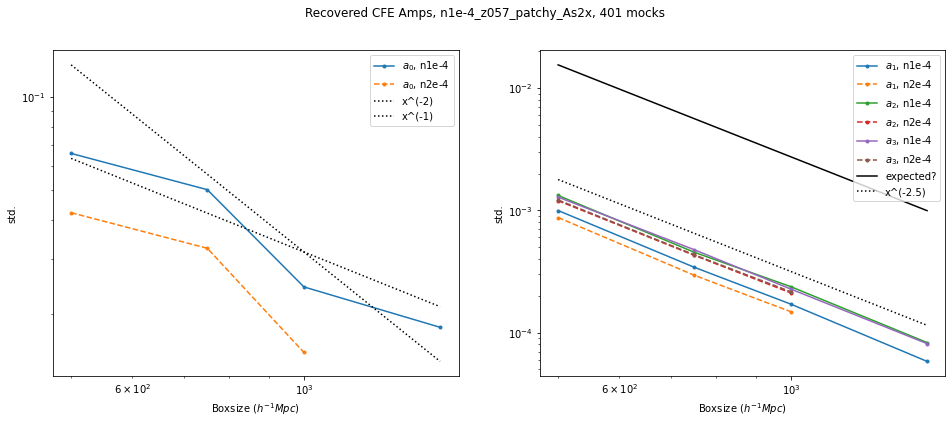

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

comps = ['$a_0$', '$a_1$', '$a_2$', '$a_3$']

axs[0].plot(Ls, stds_n1e4[:,0], marker='.', label=f'{comps[0]}, n1e-4')
axs[0].plot(Ls[:3], stds_n2e4[:,0], marker='.', ls='dashed', label=f'{comps[0]}, n2e-4')

for i in range(1,4):
    axs[1].plot(Ls, stds_n1e4[:,i], marker='.', label=f'{comps[i]}, n1e-4')
    axs[1].plot(Ls[:3], stds_n2e4[:,i], marker='.', ls='dashed', label=f'{comps[i]}, n2e-4')

# scaling lines
x = np.linspace(min(Ls), max(Ls), 2)
axs[1].plot(Ls, scalings_L, color='k', label='expected?')
axs[1].plot(x, (10**4)*x**(-2.5), color='k', ls='dotted', label=f'x^(-2.5)')
axs[0].plot(x, (10**4.5)*x**(-2), color='k', ls='dotted', label=f'x^(-2)')
axs[0].plot(x, (10**1.5)*x**(-1), color='k', ls='dotted', label=f'x^(-1)')

for ax in axs:
    # ax.set_ylim(-0.001,0.02)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
    ax.set_ylabel('std.')
    ax.legend()
fig.suptitle('Recovered CFE Amps, n1e-4_z057_patchy_As2x, 401 mocks')

In [24]:
# plot recovered grad
grads_rec_n1 = (amps_n1e4[:,:,1:].T / amps_n1e4[:,:,0].T).T
grads_rec_n1.shape

(4, 401, 3)

In [25]:
grads_exp = np.array([m/(b*Ls[0]), m/(b*Ls[1]), m/(b*Ls[2]), m/(b*Ls[3])])
grads_exp.shape

(4, 3)

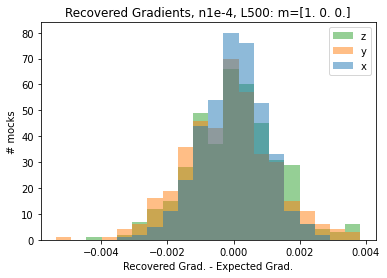

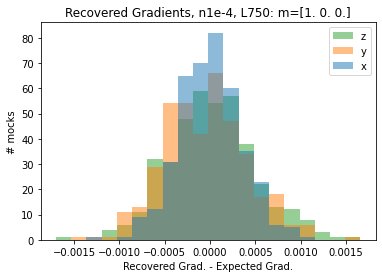

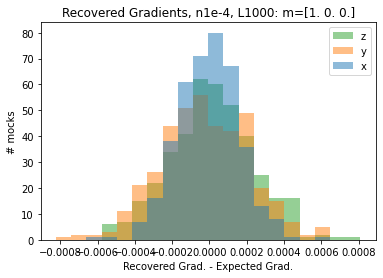

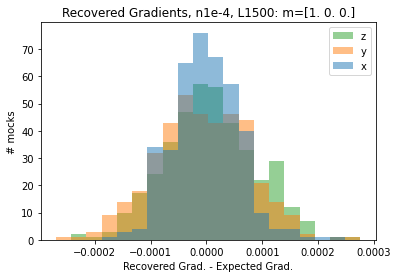

In [26]:
dims = ['x', 'y', 'z']
alpha = 0.5
for i in range(len(Ls)):
    fig, ax = plt.subplots()
    plt.hist(grads_rec_n1[i] - grads_exp[i], bins=20, alpha=alpha, histtype='stepfilled', label=dims)

    plt.title(f'Recovered Gradients, n1e-4, L{Ls[i]}: m={m}')
    plt.xlabel('Recovered Grad. - Expected Grad.')
    plt.ylabel('# mocks')
    plt.legend()

### number density vs. std

#### amplitudes

In [27]:
amps_L500_n1e4 = load_suave_amps('L500_n1e-4_z057_patchy_As2x')
amps_L500_n2e4 = load_suave_amps('L500_n2e-4_z057_patchy_As2x')
amps_L500_n4e4 = load_suave_amps('L500_n4e-4_z057_patchy_As2x')

In [28]:
amps_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x')
amps_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x')
amps_L750_n4e4 = load_suave_amps('L750_n4e-4_z057_patchy_As2x')

In [68]:
# number densities
ns = [1e-4, 2e-4, 4e-4]

#### standard deviations

In [30]:
stds_L500_n1e4 = np.std(amps_L500_n1e4, axis=0)
stds_L500_n2e4 = np.std(amps_L500_n2e4, axis=0)
stds_L500_n4e4 = np.std(amps_L500_n4e4, axis=0)

stds_L500 = np.array([stds_L500_n1e4, stds_L500_n2e4, stds_L500_n4e4])

stds_L500_n1e4, stds_L500_n2e4, stds_L500_n4e4

(array([0.06562027, 0.00099732, 0.00132538, 0.00128458]),
 array([0.04228976, 0.00087419, 0.0011988 , 0.00121762]),
 array([0.03056859, 0.00081647, 0.00109703, 0.00116922]))

In [31]:
stds_L750_n1e4 = np.std(amps_L750_n1e4, axis=0)
stds_L750_n2e4 = np.std(amps_L750_n2e4, axis=0)
stds_L750_n4e4 = np.std(amps_L750_n4e4, axis=0)

stds_L750 = np.array([stds_L750_n1e4, stds_L750_n2e4, stds_L750_n4e4])

stds_L750_n1e4, stds_L750_n2e4, stds_L750_n4e4

(array([0.05016015, 0.00034224, 0.00045429, 0.00047649]),
 array([0.03249415, 0.00029448, 0.00042857, 0.00043347]),
 array([0.01674844, 0.00028613, 0.00040876, 0.00041792]))

#### expected scalingss

In [104]:
ns_cont = np.logspace(np.log10(min(ns)), np.log10(max(ns)), 100)
scalings_n = std_grad(750, ns_cont, P_rep)

#### plot

Text(0.5, 0.98, 'Recovered CFE Amps, L500_z057_patchy_As2x, 401 mocks')

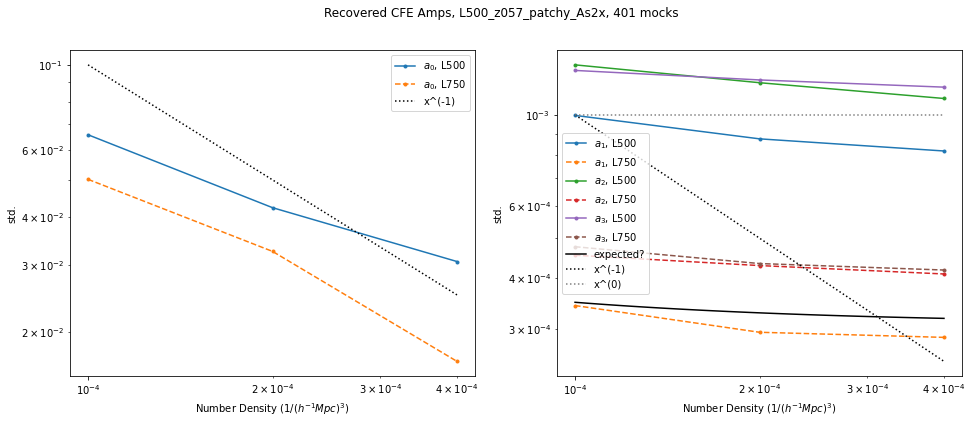

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

comps = ['$a_0$', '$a_1$', '$a_2$', '$a_3$']

axs[0].plot(ns, stds_L500[:,0], marker='.', label=f'{comps[0]}, L500')
axs[0].plot(ns, stds_L750[:,0], marker='.', ls='dashed', label=f'{comps[0]}, L750')

for i in range(1,4):
    axs[1].plot(ns, stds_L500[:,i], marker='.', label=f'{comps[i]}, L500')
    axs[1].plot(ns[:3], stds_L750[:,i], marker='.', ls='dashed', label=f'{comps[i]}, L750')

# scalings
x = np.linspace(min(ns), max(ns), 2)
axs[1].plot(ns_cont, (10**-6)*scalings_n, color='k', label='expected?')
axs[1].plot(x, (10**(-7)*x**(-1)), color='k', ls='dotted', label=f'x^(-1)')
# axs[1].plot(x, (10**(-5)*x**(-.5)), color='k', ls='dotted', label=f'x^(-.5)')
axs[1].plot(x, (10**(-3)*x**(0)), color='gray', ls='dotted', label=f'x^(0)')
axs[0].plot(x, (10**(-5))*x**(-1), color='k', ls='dotted', label=f'x^(-1)')

for ax in axs:
    # ax.set_ylim(-0.001,0.02)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Number Density ($1/(h^{-1}Mpc)^3$)')
    ax.set_ylabel('std.')
    ax.legend()
fig.suptitle('Recovered CFE Amps, L500_z057_patchy_As2x, 401 mocks')

In [107]:
ns = np.logspace(-7, 3, 1000)
stds = std_grad(750**3, ns, P_rep)

Text(0, 0.5, '$\\sigma$')

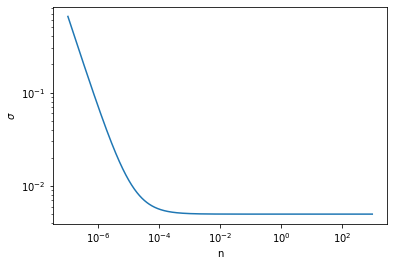

In [108]:
fig, ax = plt.subplots()

plt.plot(ns, stds)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('n')
ax.set_ylabel('$\sigma$')

In [36]:
P

array([0.03434124])

## gradient strength vs. std

In [37]:
ms = np.linspace(0,1.0, 201)

In [38]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'
amps_mrange = np.empty((201,4))
for i in range(len(ms)): 
    suave_dict = np.load(os.path.join(grad_dir, f'suave_data/{cat_tag}/bao_iterative/{cat_tag}_rlz0_m-{ms[i]:.3f}-L_b-{b}00.npy'), allow_pickle=True).item()
    amps_mrange[i] = suave_dict['amps']

In [39]:
grads_rec = (amps_mrange[:,1:].T / amps_mrange[:,0]).T
grads_rec.shape

(201, 3)

In [40]:
stds_grads_rec = np.std(grads_rec, axis=0)
stds_grads_rec

array([0.00076841, 0.00022003, 0.00018246])

In [41]:
grads_exp = np.array([ms / (b*750), np.zeros(201), np.zeros(201)]).T
grads_exp.shape

(201, 3)

In [42]:
err = grads_rec - grads_exp

In [43]:
fit_x = np.polyfit(ms, err[:,0], deg=1)
fit_y = np.polyfit(ms, err[:,1], deg=1)
fit_z = np.polyfit(ms, err[:,2], deg=1)

In [44]:
fit_x, fit_y, fit_z

(array([-8.55270952e-05,  1.04586497e-05]),
 array([ 0.00037183, -0.0002075 ]),
 array([-5.24208461e-05,  3.41776108e-04]))

Text(0.5, 0.98, 'Recovered CFE Gradients, L750_n1e-4_z057_patchy_As2x')

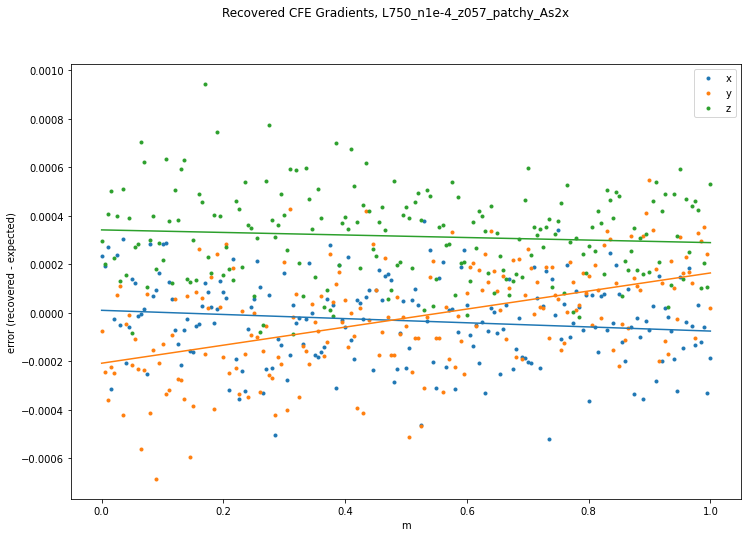

In [45]:
fig, axs = plt.subplots(figsize=(12,8))

# plt.plot(ms, grads_rec, marker='.', label='rec')
# plt.plot(ms, grads_exp, marker='.', label='exp')
plt.scatter(ms, err[:,0], marker='.', color='C0', label='x')
plt.scatter(ms, err[:,1], marker='.', color='C1', label='y')
plt.scatter(ms, err[:,2], marker='.', color='C2', label='z')

plt.plot(ms, fit_x[1]+ms*fit_x[0], color='C0')
plt.plot(ms, fit_y[1]+ms*fit_y[0], color='C1')
plt.plot(ms, fit_z[1]+ms*fit_z[0], color='C2')

x = np.linspace(min(ms), max(ms), 2)
# axs[1].plot(x, (10**(-5)*x**(-.5)), color='k', ls='dotted', label=f'x^(-.5)')

# ax.set_ylim(-0.001,0.02)
plt.xlabel('m')
plt.ylabel('error (recovered - expected)')
plt.legend()
fig.suptitle(f'Recovered CFE Gradients, {cat_tag}')

## scalings with patches method

### boxsize

In [46]:
# n1e-4, standard
amps_L500_n1e4_p = load_patch_amps('L500_n1e-4_z057_patchy_As2x')
amps_L750_n1e4_p = load_patch_amps('L750_n1e-4_z057_patchy_As2x')
amps_L1000_n1e4_p = load_patch_amps('L1000_n1e-4_z057_patchy_As2x')
amps_L1500_n1e4_p = load_patch_amps('L1500_n1e-4_z057_patchy_As2x')

amps_n1e4_p = np.array([amps_L500_n1e4_p, amps_L750_n1e4_p, amps_L1000_n1e4_p, amps_L1500_n1e4_p])

In [47]:
# n1e-4, CFE
amps_L500_n1e4_s = amps_L500_n1e4
amps_L750_n1e4_s = amps_L750_n1e4
amps_L1000_n1e4_s = amps_L1000_n1e4
amps_L1500_n1e4_s = amps_L1500_n1e4

amps_n1e4_s = np.array([amps_L500_n1e4_s, amps_L750_n1e4_s, amps_L1000_n1e4_s, amps_L1500_n1e4_s])

In [48]:
amps_n1e4_p.shape

(4, 401, 4)

In [49]:
# divide positional components by the first constant term to get gradient values:
grads_rec_n1e4_p = (amps_n1e4_p[:,:,1:].T / amps_n1e4_p[:,:,0].T).T
grads_rec_n1e4_s = (amps_n1e4_s[:,:,1:].T / amps_n1e4_s[:,:,0].T).T

In [50]:
grads_rec_n1e4_p.shape

(4, 401, 3)

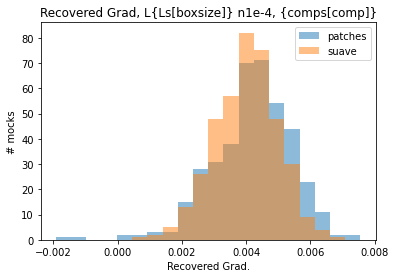

In [51]:
comp = 0
boxsize = 0
_, bins, _ = plt.hist(grads_rec_n1e4_p[boxsize,:,comp], bins=20, alpha=0.5, histtype='stepfilled', label='patches')
plt.hist(grads_rec_n1e4_s[boxsize,:,comp], bins=bins, alpha=0.5, histtype='stepfilled', label='suave')

plt.title(f'Recovered Grad, L{Ls[boxsize]} n1e-4, {comps[comp]}')
plt.xlabel('Recovered Grad.')
plt.ylabel('# mocks')
plt.legend()

In [52]:
# standard deviations
stds_grads_rec_n1e4_p = np.std(grads_rec_n1e4_p, axis=1)
stds_grads_rec_n1e4_s = np.std(grads_rec_n1e4_s, axis=1)
stds_grads_rec_n1e4_p.shape

(4, 3)

Text(0.5, 1.0, 'Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

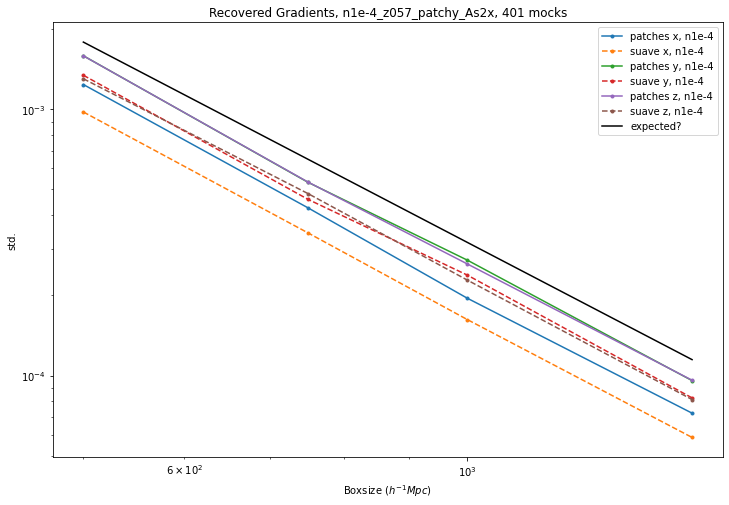

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

comps = ['x', 'y', 'z']

for i in range(3):
    ax.plot(Ls, stds_grads_rec_n1e4_p[:,i], marker='.', label=f'patches {comps[i]}, n1e-4')
    ax.plot(Ls, stds_grads_rec_n1e4_s[:,i], marker='.', ls='dashed', label=f'suave {comps[i]}, n1e-4')

# scaling lines
x = np.linspace(min(Ls), max(Ls), 2)
ax.plot(Ls, scalings_L, color='k', label='expected?')
# ax.plot(x, (10**4)*x**(-2.5), color='k', ls='dotted', label=f'x^(-2.5)')
# ax.plot(x, (10**4.5)*x**(-2), color='k', ls='dotted', label=f'x^(-2)')
# ax.plot(x, (10**1.5)*x**(-1), color='k', ls='dotted', label=f'x^(-1)')

# ax.set_ylim(-0.001,0.02)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
ax.set_ylabel('std.')
ax.legend()
ax.set_title('Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

### number density

In [54]:
# L500, standard
amps_L500_n1e6_p = load_patch_amps('L500_n1e-6_z057_patchy_As2x')
amps_L500_n1e5_p = load_patch_amps('L500_n1e-5_z057_patchy_As2x')
amps_L500_n1e4_p = load_patch_amps('L500_n1e-4_z057_patchy_As2x')
amps_L500_n2e4_p = load_patch_amps('L500_n2e-4_z057_patchy_As2x')

# amps_n1e4_p = np.array([amps_L500_n1e4_p, amps_L750_n1e4_p, amps_L1000_n1e4_p, amps_L1500_n1e4_p])

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/aew492/research-summer2020_output/gradient/1D/patch_data/L500_n1e-6_z057_patchy_As2x/8patches/test_dir/L500_n1e-6_z057_patchy_As2x_rlz0_m-1.000-L_b-0.500.npy'